In [62]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
warnings.filterwarnings("ignore")
df = pd.read_csv("/Users/hajiaga/Downloads/creditcard.csv")

In [63]:
import matplotlib.pyplot as plt

def get_outliers(data , column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    return [data.loc[(data[column].astype(float) < lower_bound) | (data[column].astype(float) > upper_bound)].shape[0] , lower_bound ,upper_bound]

lowers , uppers = [] , []
for col in df.columns:
    lowers.append(get_outliers(df,col)[1])
    uppers.append(get_outliers(df,col)[2])
print(lowers)
print(uppers)
np.sum((df>lowers) & ( df<uppers),axis=1)>8
df = df[np.sum((df>lowers) & ( df<uppers),axis=1)>23]
df.info()
def get_outliers(data , column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    

[-73477.0, -4.274396001792603, -2.7019605905224315, -3.7667054090861836, -3.236612225031064, -2.646882336821933, -2.51858636568538, -2.240843806907704, -1.0125931529838397, -2.503452471089882, -2.0194494839425694, -3.015625599764853, -1.941285763020238, -2.6151056869463822, -1.803659804964707, -2.430441907369377, -1.955036385495261, -1.8088832582431966, -1.9983346169934264, -1.8291713305051371, -0.7288646731770594, -0.8505531720141558, -2.148706384652634, -0.6260789583212862, -1.5457552412760254, -1.318935979464254, -1.178888075273932, -0.3136665027898834, -0.24981941467918245, -101.7475, 0.0]
[266999.0, 4.669664311280146, 2.90713454829761, 3.9035361133965982, 3.1313133981683787, 2.5672117056694685, 2.148855653580996, 2.2572040007487804, 1.1313092708678223, 2.457493931105559, 1.9379472025887527, 2.9927248115734812, 2.1539523105259604, 2.629071347271788, 1.8712356417278626, 2.496378434529079, 2.010295931257707, 1.7248099271865331, 2.0002915652156013, 1.8318217675233686, 0.65018414949710

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274329 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    274329 non-null  float64
 1   V1      274329 non-null  float64
 2   V2      274329 non-null  float64
 3   V3      274329 non-null  float64
 4   V4      274329 non-null  float64
 5   V5      274329 non-null  float64
 6   V6      274329 non-null  float64
 7   V7      274329 non-null  float64
 8   V8      274329 non-null  float64
 9   V9      274329 non-null  float64
 10  V10     274329 non-null  float64
 11  V11     274329 non-null  float64
 12  V12     274329 non-null  float64
 13  V13     274329 non-null  float64
 14  V14     274329 non-null  float64
 15  V15     274329 non-null  float64
 16  V16     274329 non-null  float64
 17  V17     274329 non-null  float64
 18  V18     274329 non-null  float64
 19  V19     274329 non-null  float64
 20  V20     274329 non-null  float64
 21  V21     27

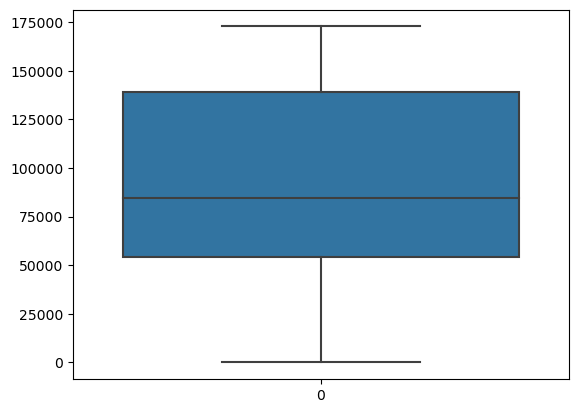

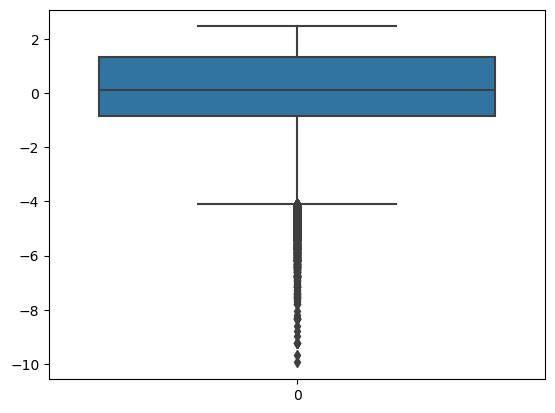

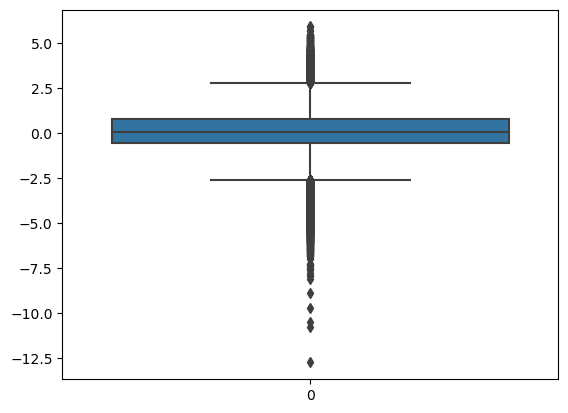

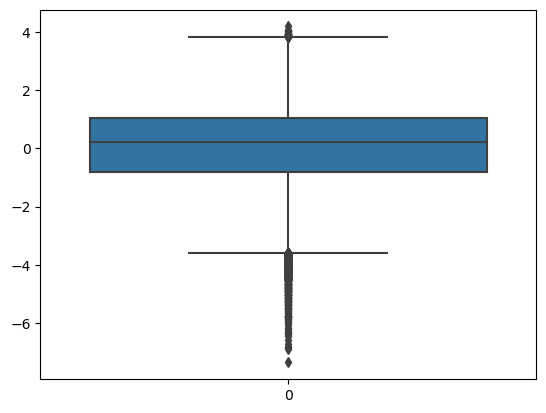

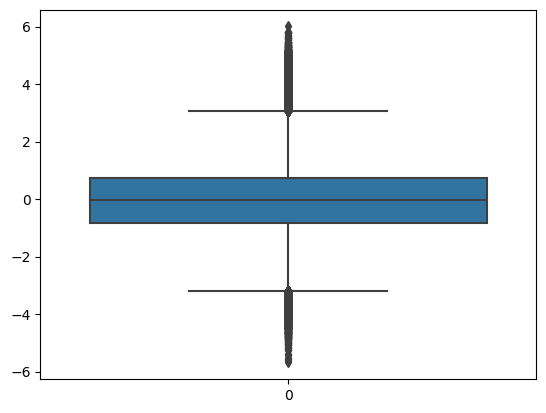

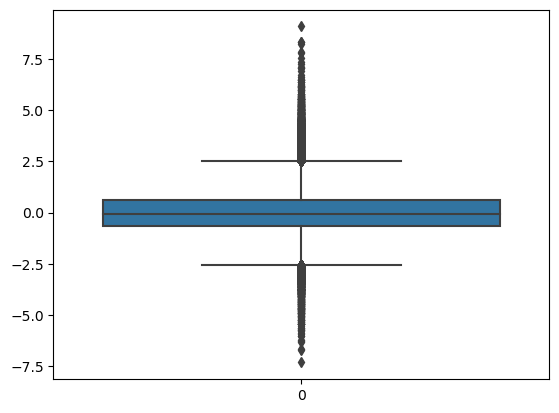

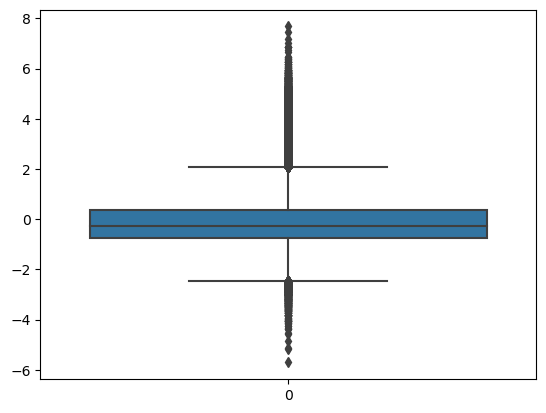

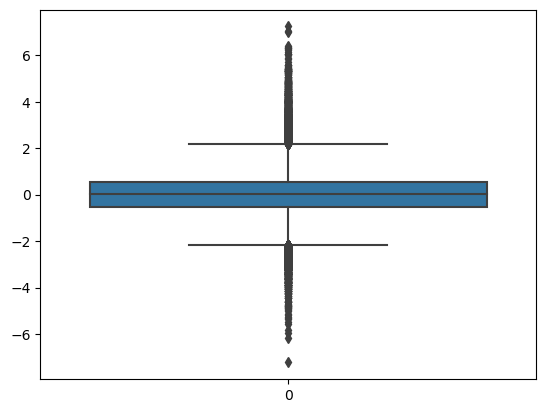

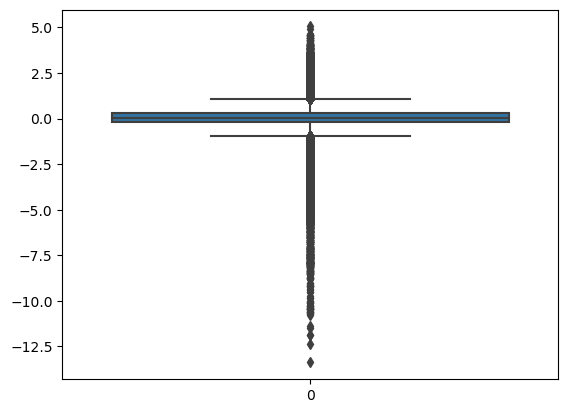

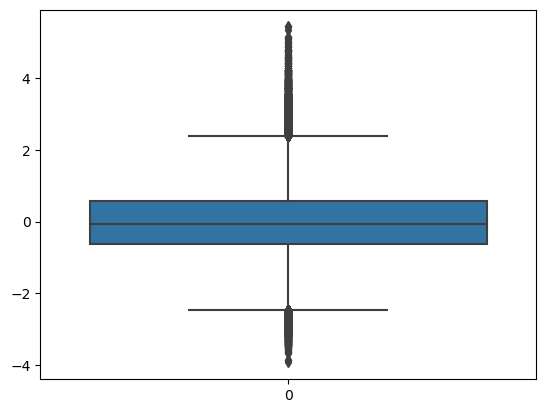

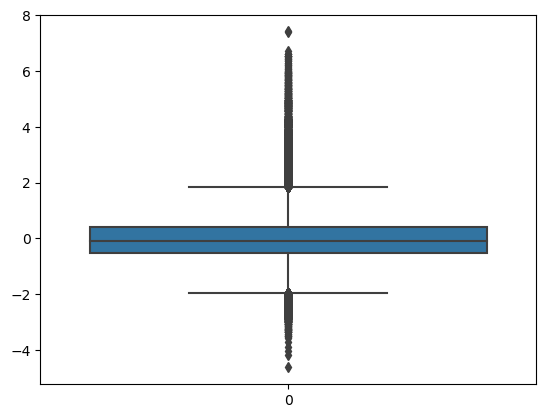

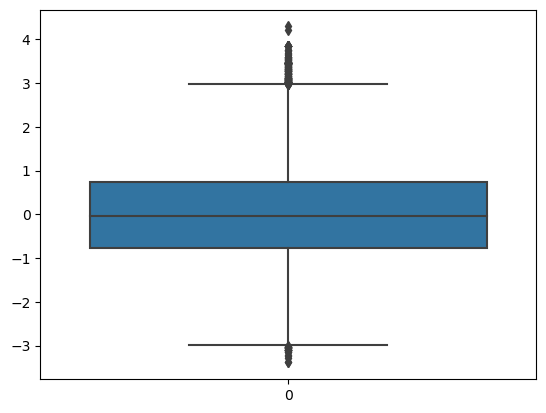

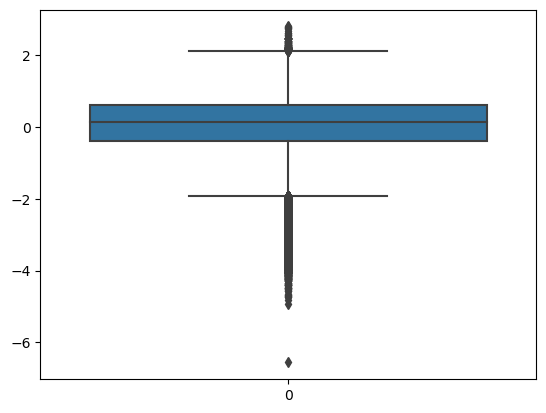

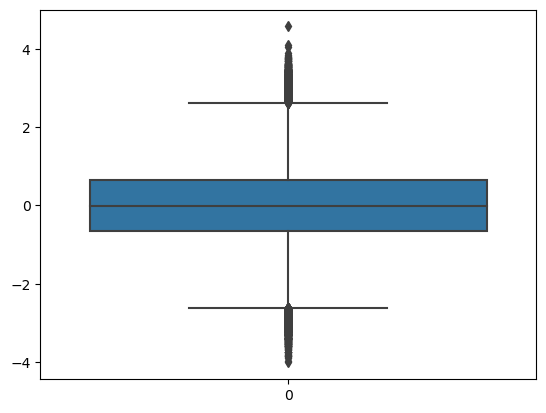

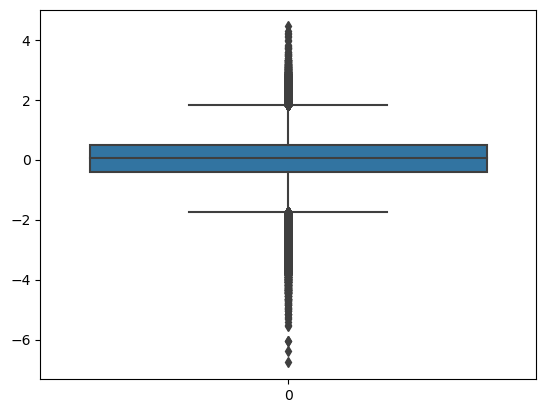

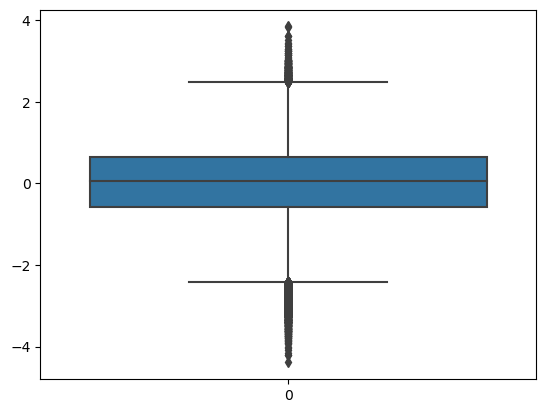

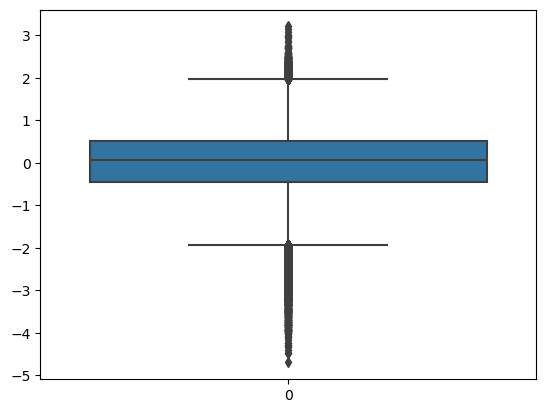

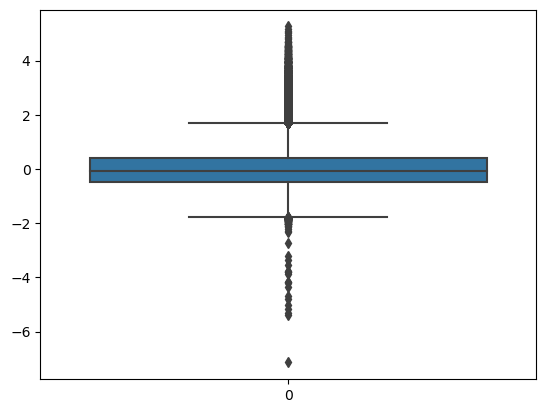

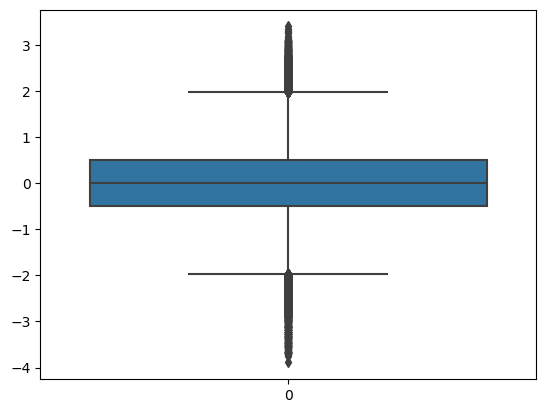

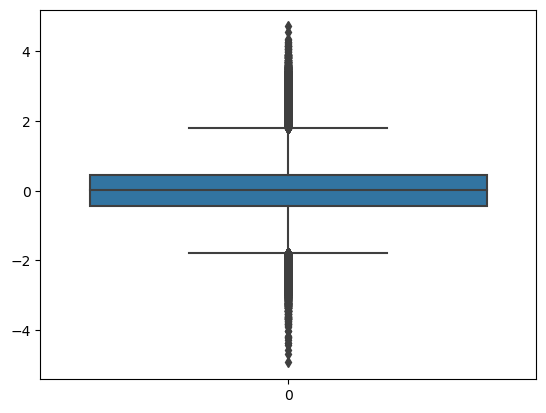

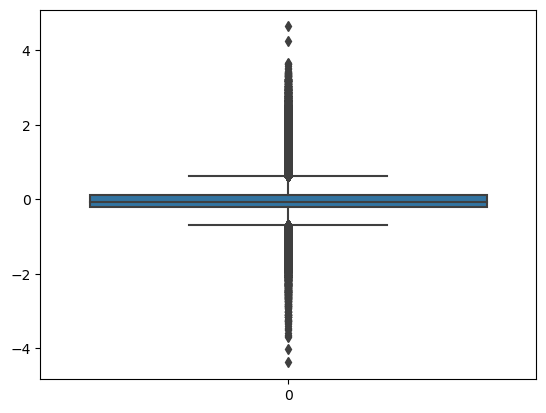

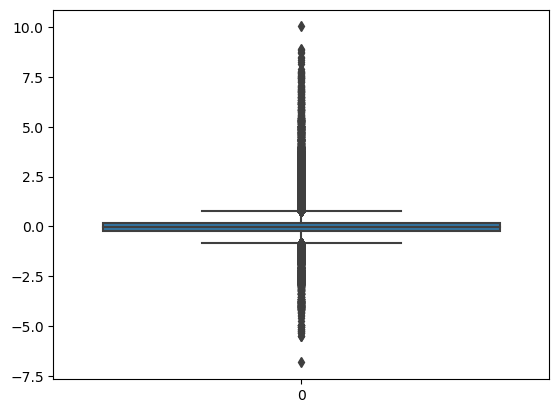

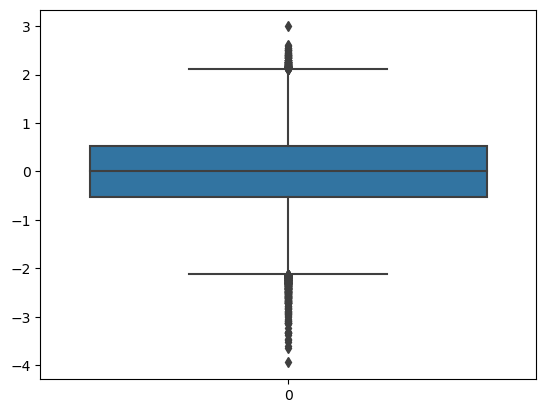

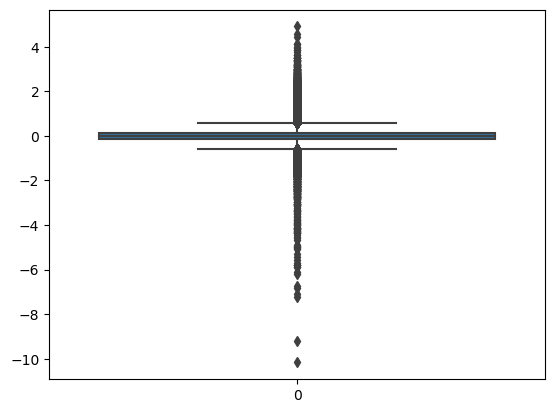

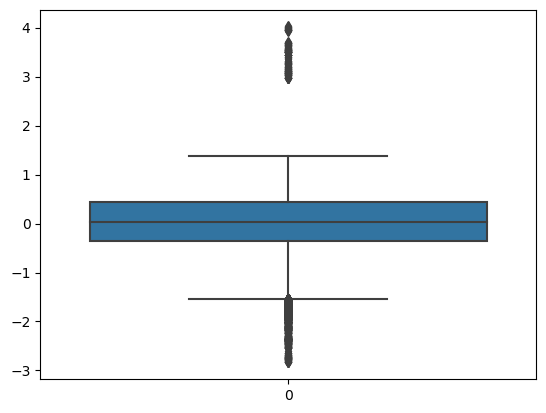

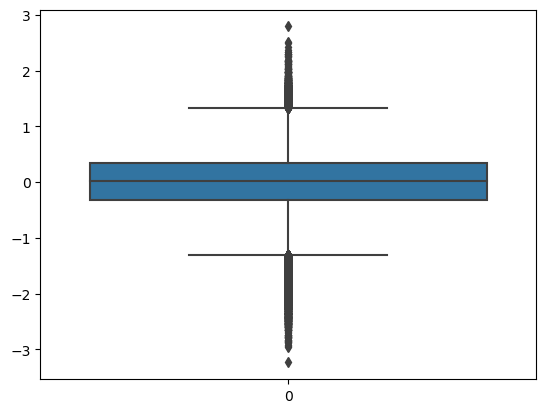

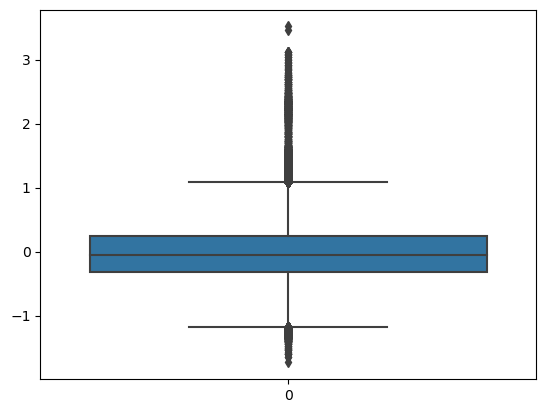

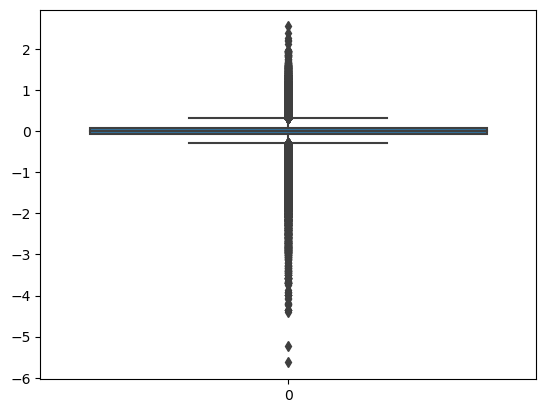

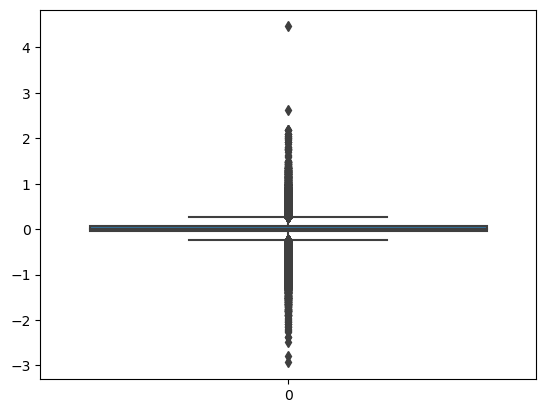

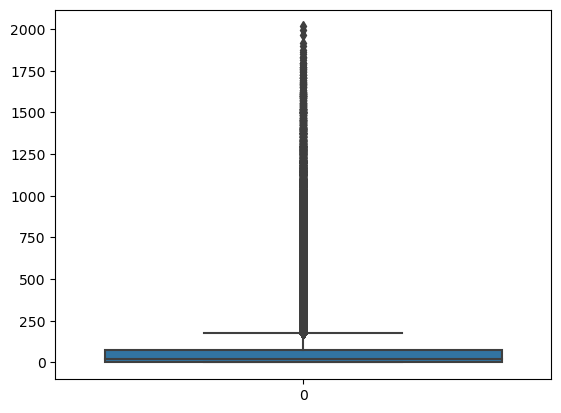

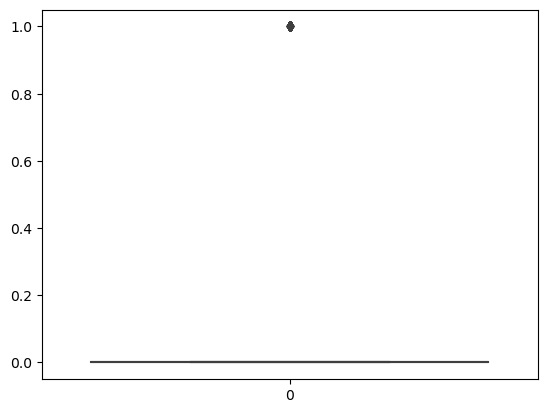

In [65]:
#Lets start with detecting outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()